In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
cd /Users/leayamashiro/FFC_4

/Users/leayamashiro/FFC_4


### Load in *Files*

In [4]:
# nice and easy way of loading, just by giving it the paths and then iterating over all paths with the .npz
phases = ['/Users/leayamashiro/FFC_4/data/obs_042424/Phase1', '/Users/leayamashiro/FFC_4/data/obs_042424/Phase2',
          '/Users/leayamashiro/FFC_4/data/obs_042524']
files = [file for directory in phases for file in glob.glob(f'{directory}/*.npz')]
table = pd.read_csv('Leusch_Stuff/RA_Sorted.csv')

In [5]:
table.loc[100:200]

Unnamed: 0      L     B          RA        DEC  Galactic_Index
100         100  179.6  54.0  152.248135  41.021947             322
101         101  161.2  50.6  152.372373  52.737622             273
102         102  175.0  54.0  152.999331  43.667691             310
103         103  133.6  37.0  153.105679  76.632952             197
104         104  138.2  40.4  153.191457  71.689912             210
..          ...    ...   ...         ...        ...             ...
196         196   69.2  57.4  228.562741  41.897444              35
197         197   83.0  54.0  229.112541  50.356806              70
198         198   64.6  57.4  229.310838  39.485337              23
199         199   92.2  50.6  229.322469  56.921754              93
200         200   60.0  57.4  229.802419  37.037698              11

[101 rows x 6 columns]

In [6]:
files

['/Users/leayamashiro/FFC_4/data/obs_042424/Phase1/spec36_L170_B27.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase1/spec135_L134_B47.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase1/spec69_L170_B40.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase1/spec105_L170_B54.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase1/spec23_L161_B23.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase1/spec41_L157_B30.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase1/spec32_L175_B23.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase1/spec132_L147_B57.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase1/spec116_L157_B54.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase1/spec136_L143_B57.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase1/spec110_L147_B47.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase1/spec15_L161_B20.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase1/spec63_L161_B37.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/P

In [7]:
# sort files by the original "galactic index" which ordered 
# the coordinates in galactic 
leusch_data = sorted(files, key=lambda x: np.load(x)['coords'][5])

In [8]:
leusch_data

['/Users/leayamashiro/FFC_4/data/obs_042424/Phase2/spec292_L60_B20.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase2/spec286_L60_B23.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase2/spec277_L60_B27.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase2/spec270_L60_B30.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase2/spec261_L60_B34.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase2/spec252_L60_B37.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase2/spec244_L60_B40.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase2/spec236_L60_B44.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase2/spec229_L60_B47.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase2/spec221_L60_B51.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase2/spec210_L60_B54.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase2/spec200_L60_B57.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase2/spec295_L65_B20.npz',
 '/Users/leayamashiro/FFC_4/data/obs_042424/Phase2/

### Load in *Data*

In [9]:
# make length object, empty arrays
len_testdata = len(leusch_data) 
pwr0 = [] 
pwr1 = []
unix = []
coordinates = []
alt_az = []
jd = []
galactic = []

# iterate through all 'testdata' object 
# grab info as well 
for n in range(len_testdata):
    test_dataFiles = np.load(leusch_data[n])
    # spectra 
    pwr0.append(test_dataFiles["data0"]) # Append data
    pwr1.append(test_dataFiles["data1"])
    unix.append(test_dataFiles['time'][()])
    coordinates.append(test_dataFiles['coords'])
    galactic.append([test_dataFiles['coords'][1], test_dataFiles['coords'][2]])
    jd.append(test_dataFiles['jd'])

### Fourier-Shift Data and Create Freqs Array

In [10]:
# shift all da spectra

for i in range(len(pwr0)): 
    pwr0[i] = np.fft.fftshift(pwr0[i])

for i in range(len(pwr1)):
    pwr1[i] = np.fft.fftshift(pwr1[i])

In [11]:
freqs = 1420 + np.fft.fftshift(np.fft.fftfreq(len(pwr0[i]), 1/3.2))

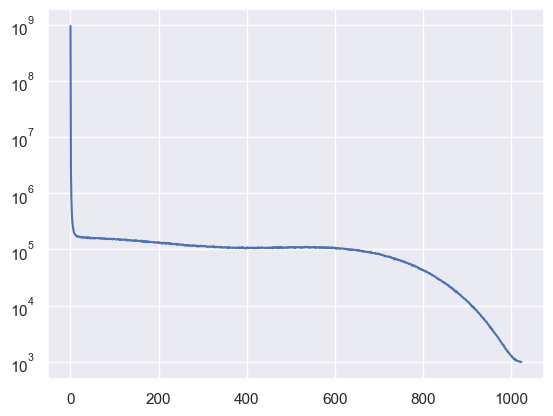

In [12]:
switch_set = pwr0[10][0:1025] 
switch_index = np.arange(0, 1025, 1)
switched = np.flip(switch_set)
plt.semilogy(switched) # NOTE: no hydrogen! because we took the mirror side of FFT and flipped it


(0.6, 2)

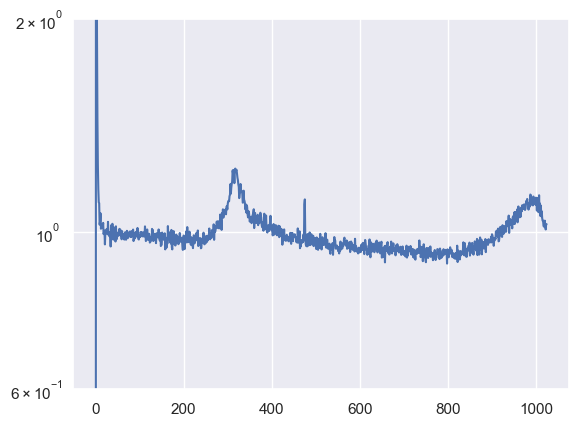

In [13]:
# now divide it, and plot
pwr0_flat_please = pwr0[10][1023:2048]/switched 
plt.semilogy(pwr0_flat_please)
plt.ylim(0.6, 2)

(0.6, 2)

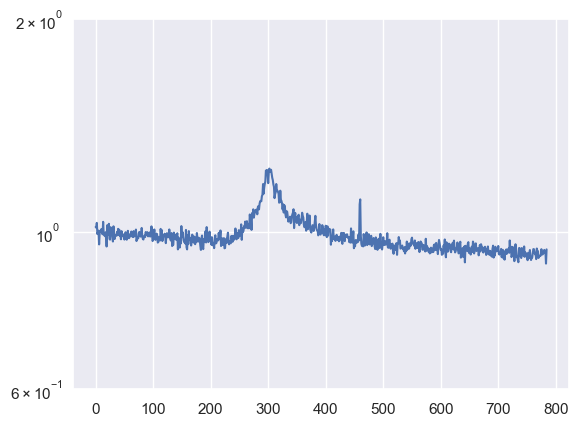

In [14]:
# that spike at 0 is ugly. let's exclude her from now on, and exclude the end bit too: 
pwr0_flatter = pwr0_flat_please[15:800]
plt.semilogy(pwr0_flatter)
plt.ylim(0.6, 2)

In [15]:
# first do doppler correction 
# then do the flattening 
# then subtract polyfit

### Getting Temperature for Maps  

In [29]:
# this is a loop to do that S-line division to all of the power spectra

divided0 = [] 
chunked0 = []
for i in range(len(pwr0)):
    spectra = pwr0[i]
    switch_set = spectra[0:1024] 
    switched = np.flip(switch_set)
    flatter = spectra[1024:2048]/switched
    chunked = flatter[5:800]
    divided0.append(flatter)
    chunked0.append(chunked)

divided1 = []
chunked1 = []
for i in range(len(pwr1)):
    spectra = pwr1[i]
    switch_set = spectra[0:1024] 
    switched = np.flip(switch_set)
    flatter = spectra[1024:2048]/switched
    chunked = flatter[50:800]
    divided1.append(flatter)
    chunked1.append(chunked)

# in these loops, once we find gain, we can just multiply 
# the new T-line spectra (the "flatter" and "chunked") by that gain value

In [30]:
len(chunked0[0])

795

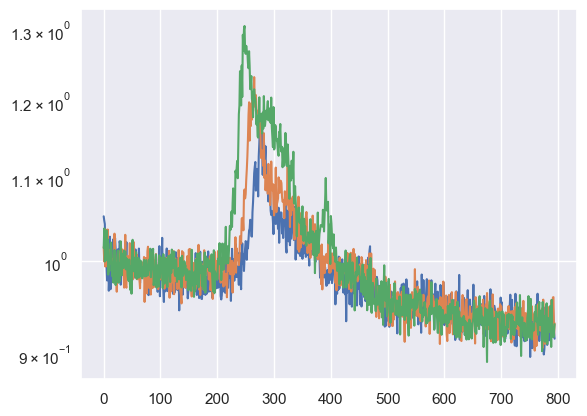

In [17]:
plt.semilogy(chunked0[30])
plt.semilogy(chunked0[40])
plt.semilogy(chunked0[50])

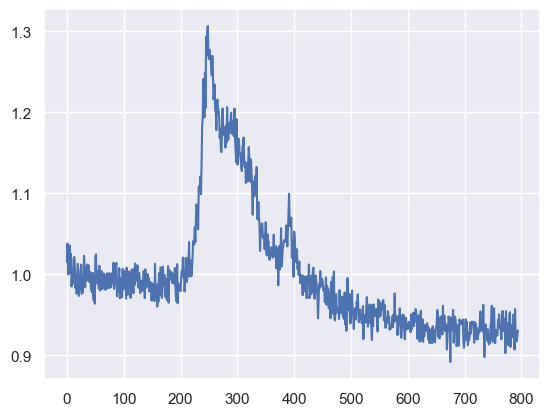

In [18]:
chunk_test = chunked0[50]
plt.plot(chunk_test)

In [19]:
Xs = np.arange(50, 801, 1)
Xs

array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 23

In [20]:
len(chunk_test)

795

In [21]:
len(Xs)

751

In [22]:
avg_part1 = np.mean(chunk_test[0:200])
avg_part2 = np.mean(chunk_test[600:-1])

print(avg_part1, avg_part2)

Xs = np.arange(0, 795, 1)

deg_1_slope = avg_part2 - avg_part1
print(deg_1_slope)

line = deg_1_slope*Xs + 1

line_resid = chunk_test - line

0.9924032504606403 0.9329647186318052
-0.05943853182883507


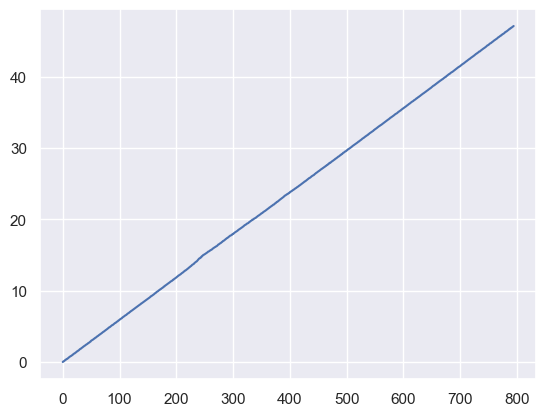

In [23]:
#plt.plot(chunk_test)
#plt.plot(line)
plt.plot(line_resid)

313

In [31]:
from scipy.signal import find_peaks

In [39]:
chunked0

[array([1.0633898 , 1.02837191, 1.08034742, 1.01757081, 1.01069712,
        1.01088431, 0.99616178, 0.99660475, 0.97784224, 0.972473  ,
        0.99502403, 1.03271658, 0.97958605, 1.02126621, 1.00725319,
        1.00116772, 0.98707086, 1.00258708, 0.99366193, 1.0096091 ,
        1.01314875, 1.02421726, 1.00332799, 1.00753916, 0.97630636,
        1.03302849, 1.01488621, 0.9704824 , 1.00498523, 1.00421832,
        0.99381158, 1.0183272 , 1.02237038, 1.02469231, 0.9952245 ,
        1.0243206 , 1.00013488, 0.99624198, 0.96070709, 1.01370062,
        1.00036976, 0.98888124, 1.00689024, 1.01499542, 1.00487806,
        1.01837854, 0.99588806, 0.99127974, 0.99414688, 1.00773866,
        0.99541958, 1.0031899 , 1.01416385, 0.98528662, 0.98746889,
        1.01045056, 0.98789652, 1.00815487, 0.9777399 , 1.00480235,
        0.99078468, 1.02041199, 0.96674397, 0.98864707, 0.98726127,
        0.9924461 , 1.03340666, 1.01369203, 0.97165993, 0.99599169,
        0.98967398, 1.01080744, 0.99131263, 1.01

In [40]:
chunked0_G = []
for i in range(len(chunked0)):
    chunked0_G_i = chunked0[i]*85
    chunked0_G.append(chunked0_G_i)

In [71]:
len(chunked0_G)

313

In [88]:
print(len(chunked0_G[i]), min(chunked0[i]))

795 0.8940248722663601


In [91]:
# getting the peaks 
# NOTE: this will work the same once we get temperature
# in reality we will be passing calibrated T-line spectra through this
peaks_array = []
freq_divided = freqs[1024:2048]
freq_chunked = freq_divided[5:600]

for i in range(len(chunked0_G)):
    if 0 < i < 180 & 223 < i < 312:
        peaks_indices, _ = find_peaks(chunked0_G[i]) # get indices of the peaks 
        peak_values_pre = [] # make empty array for storing peak values in nested loop
        for j in range(len(peaks_indices)):
            indiv_peaks = chunked0_G[i][peaks_indices[j]] # grab peak value at index of the individual spectra
            peak_values_pre.append(indiv_peaks) # append the peak value to a list of peak values for THAT spectra
        peak_max = max(peak_values_pre) # take the max of the peak values array, THAT'S the MAIN HI peak for that spectra
        peaks_array.append(peak_max)
    else: 
        chunked0_G_again = chunked0_G[i][200:450]
        peaks_indices_special, _ = find_peaks(chunked0_G_again) # get indices of the peaks 
        peak_values_pre_special = [] # make empty array for storing peak values in nested loop
        for j in range(len(peaks_indices_special)):
            indiv_peaks = chunked0_G[i][200:450][peaks_indices_special[j]] # grab peak value at index of the individual spectra
            peak_values_pre_special.append(indiv_peaks) # append the peak value to a list of peak values for THAT spectra
        peak_max_special = max(peak_values_pre_special) # take the max of the peak values array, THAT'S the MAIN HI peak for that spectra
        peaks_array.append(peak_max_special)


In [94]:
max(peaks_array)

152.97035873828293

In [97]:
peaks_array

[105.60390724224274,
 97.20944670986877,
 95.14954568434774,
 95.52010839280887,
 95.89007952594214,
 95.3080983061702,
 98.05202461758265,
 101.77789832207874,
 105.08723771403596,
 108.277803791304,
 104.49477206928351,
 108.04979231748796,
 103.7518134916309,
 99.9107132565913,
 99.4259687783095,
 98.62349351864701,
 96.07593357944906,
 96.8171247713218,
 99.0206451816717,
 101.69586042246463,
 105.15642268235852,
 111.21022194191865,
 108.77470090563915,
 107.93844293651293,
 97.73277063524165,
 97.71400531295339,
 96.7436715689352,
 97.10554138735057,
 97.5238725599211,
 100.04530006696126,
 99.20705970534362,
 102.28740718041128,
 104.026309630992,
 107.81508494452237,
 111.17826699763587,
 108.07221367004556,
 102.75715434217543,
 104.37729034647471,
 101.43440909822735,
 104.64529480958514,
 104.78194945521912,
 104.51814844669886,
 104.44799365094867,
 105.30806859350568,
 103.3925221270837,
 110.41966695401528,
 112.80878238456104,
 111.08455195648585,
 114.10041407781283,
 1

47

90.61791990964322

In [99]:
T_arr

array([105.60390724,  97.20944671,  95.14954568,  95.52010839,
        95.89007953,  95.30809831,  98.05202462, 101.77789832,
       105.08723771, 108.27780379, 104.49477207, 108.04979232,
       103.75181349,  99.91071326,  99.42596878,  98.62349352,
        96.07593358,  96.81712477,  99.02064518, 101.69586042,
       105.15642268, 111.21022194, 108.77470091, 107.93844294,
        97.73277064,  97.71400531,  96.74367157,  97.10554139,
        97.52387256, 100.04530007,  99.20705971, 102.28740718,
       104.02630963, 107.81508494, 111.178267  , 108.07221367,
       102.75715434, 104.37729035, 101.4344091 , 104.64529481,
       104.78194946, 104.51814845, 104.44799365, 105.30806859,
       103.39252213, 110.41966695, 112.80878238, 111.08455196,
       114.10041408, 112.96505222, 111.04877508, 114.2375065 ,
       114.34567448, 111.58645061, 107.67132149, 110.92225112,
       110.46874368, 112.12260653, 112.08281226, 113.58450667,
       122.67803231, 115.74489681, 114.14537669, 119.36

In [98]:
T_arr = np.array(peaks_array)

In [102]:
L_array = np.arange(60, 180, 4)
B_array = np.arange(20, 60, 3)
ll, bb = np.meshgrid(L_array, B_array)



lb_val  = []
indexes = []


for i in range(len(ll[:,0])):
    for j in range(len(bb[0,:])):
        
        #HOLDING THE ROW INDEX
        row = i
        #HOLDS THE COLUMN INDEX
        column = j
        
        #HOLDS THE INDEX IN A LIST
        index = [i,j]
        
        #APPENDING THE VALUE FOR LL AND BB INTO THE [L,B] GALACTIC COORDINATES
        lb_val.append([ll[i,j], bb[i,j]])
        indexes.append(index)


        
tolerance = 3.5
#MAKING A MATRIX
matrix = np.zeros((14, 30, 1), dtype = int)

#r_img = img[:,:,0]
#g_img = img[:,:,1]
#b_img = img[:,:,2]

N = 0


for i in range(len(T_arr)):
    
    l = float(galactic[i][0])
    b = float(galactic[i][1])

    for m in range(len(lb_val)):
        def find_nearest(array, value):
            array = np.asarray(array)
            idx = (np.abs(array - value)).argmin()
            return idx
        
        if np.isclose(l, lb_val[m][0], atol=tolerance) and np.isclose(b, lb_val[m][1], atol=tolerance):
            #GETS THE INDEXES
            row_index = indexes[m][0]
            column_index = indexes[m][1]

        #GETTING THE CORRESPONDING VELOCITY
            T = T_arr[i]

            matrix[row_index, column_index, 0] = T

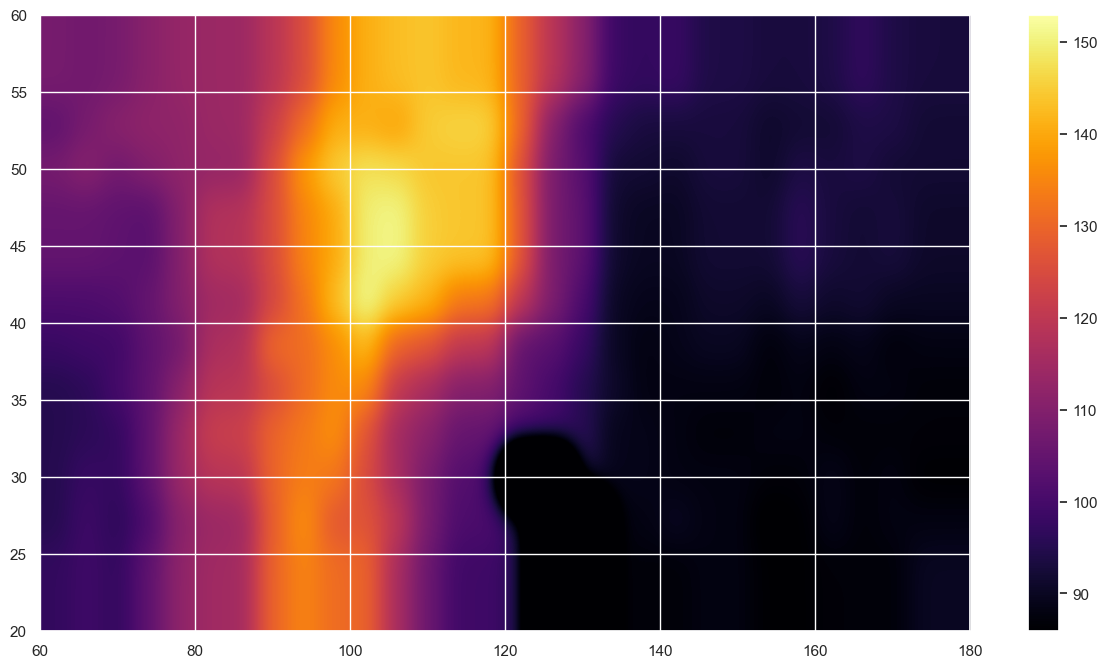

In [104]:
plt.figure(figsize = (15, 8))
plt.imshow(matrix, cmap = 'inferno', interpolation= 'gaussian', aspect = 'auto', origin = 'lower', extent=[60, 180, 20, 60], vmin=np.amin(T_arr), vmax=np.amax(T_arr))
cbar = plt.colorbar()
plt.savefig('firstgo.png')

### Okay now goal is to put all of those peak values into a big matrix corresponding to their galactic position for mapping.

In [246]:
# because of how data was collected, the galactic coordinates are saved in the object "galactic"
print(len(galactic))
galactic
# and thankfully, because of the beginning, they are ordered exactly 
# the same as the spectra! 

313


[[60.0, 20.0],
 [60.0, 23.4],
 [60.0, 26.8],
 [60.0, 30.2],
 [60.0, 33.599999999999994],
 [60.0, 36.99999999999999],
 [60.0, 40.39999999999999],
 [60.0, 43.79999999999999],
 [60.0, 47.19999999999999],
 [60.0, 50.59999999999999],
 [60.0, 53.99999999999999],
 [60.0, 57.399999999999984],
 [64.6, 20.0],
 [64.6, 23.4],
 [64.6, 26.8],
 [64.6, 30.2],
 [64.6, 33.599999999999994],
 [64.6, 36.99999999999999],
 [64.6, 40.39999999999999],
 [64.6, 43.79999999999999],
 [64.6, 47.19999999999999],
 [64.6, 50.59999999999999],
 [64.6, 53.99999999999999],
 [64.6, 57.399999999999984],
 [69.19999999999999, 20.0],
 [69.19999999999999, 23.4],
 [69.19999999999999, 26.8],
 [69.19999999999999, 30.2],
 [69.19999999999999, 33.599999999999994],
 [69.19999999999999, 36.99999999999999],
 [69.19999999999999, 40.39999999999999],
 [69.19999999999999, 43.79999999999999],
 [69.19999999999999, 47.19999999999999],
 [69.19999999999999, 50.59999999999999],
 [69.19999999999999, 53.99999999999999],
 [69.19999999999999, 57.3999

In [247]:
# so make combined array pulling peak value and assigning to coordinates

combined_array = []
for i in range(len(galactic)):
    combined = [galactic[i], peaks_array[i]]
    combined_array.append(combined)
    
    

In [249]:
combined_array

[[[60.0, 20.0], 1.2423989087322675],
 [[60.0, 23.4], 1.1436405495278679],
 [[60.0, 26.8], 1.1194064198158558],
 [[60.0, 30.2], 1.123765981091869],
 [[60.0, 33.599999999999994], 1.1281185826581428],
 [[60.0, 36.99999999999999], 1.1212717447784728],
 [[60.0, 40.39999999999999], 1.15355323079509],
 [[60.0, 43.79999999999999], 1.1973870390832793],
 [[60.0, 47.19999999999999], 1.2363204436945407],
 [[60.0, 50.59999999999999], 1.2738565151918118],
 [[60.0, 53.99999999999999], 1.2293502596386296],
 [[60.0, 57.399999999999984], 1.3030010396870604],
 [[64.6, 20.0], 1.2206095704897753],
 [[64.6, 23.4], 1.1754201559598976],
 [[64.6, 26.8], 1.1697172797448177],
 [[64.6, 30.2], 1.1602763943370236],
 [[64.6, 33.599999999999994], 1.1303051009346947],
 [[64.6, 36.99999999999999], 1.1390249973096682],
 [[64.6, 40.39999999999999], 1.1649487668431964],
 [[64.6, 43.79999999999999], 1.1964218873231134],
 [[64.6, 47.19999999999999], 1.2371343844983356],
 [[64.6, 50.59999999999999], 1.3083555522578665],
 [[6

In [250]:
plt.imshow?

Signature:
plt.imshow(
    X,
    cmap=None,
    norm=None,
    *,
    aspect=None,
    interpolation=None,
    alpha=None,
    vmin=None,
    vmax=None,
    origin=None,
    extent=None,
    interpolation_stage=None,
    filternorm=True,
    filterrad=4.0,
    resample=None,
    url=None,
    data=None,
    **kwargs,
)
Docstring:
Display data as an image, i.e., on a 2D regular raster.

The input may either be actual RGB(A) data, or 2D scalar data, which
will be rendered as a pseudocolor image. For displaying a grayscale
image set up the colormapping using the parameters
``cmap='gray', vmin=0, vmax=255``.

The number of pixels used to render an image is set by the Axes size
and the *dpi* of the figure. This can lead to aliasing artifacts when
the image is resampled because the displayed image size will usually
not match the size of *X* (see
:doc:`/gallery/images_contours_and_fields/image_antialiasing`).
The resampling can be controlled via the *interpolation* parameter
and/or :rc:`imag